https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/logistic_regression/main.py#L33-L34

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [14]:
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# 1 Этап - Данные

In [3]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

C:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [21]:
type(train_dataset[0])

tuple

In [9]:
len(test_dataset)

10000

In [11]:
x, y = train_dataset[0]

In [12]:
x.shape

torch.Size([1, 28, 28])

In [17]:
x.squeeze().shape

torch.Size([28, 28])

In [13]:
y

5

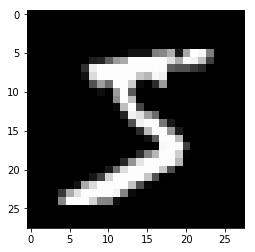

In [19]:
plt.imshow(x.squeeze(), cmap='gray')

In [4]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


# 2 этап - Нейронная сеть

In [43]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [29]:
model

Linear(in_features=784, out_features=10, bias=True)

In [30]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.0194, -0.0287,  0.0211,  ..., -0.0028,  0.0050, -0.0297],
        [-0.0251, -0.0052, -0.0208,  ...,  0.0277,  0.0110, -0.0199],
        [ 0.0181,  0.0328,  0.0071,  ..., -0.0250,  0.0046,  0.0225],
        ...,
        [ 0.0175, -0.0244,  0.0052,  ...,  0.0170,  0.0249, -0.0054],
        [-0.0070,  0.0043, -0.0307,  ...,  0.0253,  0.0190,  0.0327],
        [-0.0330,  0.0294, -0.0071,  ...,  0.0273, -0.0140,  0.0246]],
       requires_grad=True)
Parameter containing:
tensor([-0.0157, -0.0337, -0.0311, -0.0065,  0.0253, -0.0155, -0.0282, -0.0014,
         0.0346, -0.0328], requires_grad=True)


In [31]:
model.weight.data

tensor([[-0.0194, -0.0287,  0.0211,  ..., -0.0028,  0.0050, -0.0297],
        [-0.0251, -0.0052, -0.0208,  ...,  0.0277,  0.0110, -0.0199],
        [ 0.0181,  0.0328,  0.0071,  ..., -0.0250,  0.0046,  0.0225],
        ...,
        [ 0.0175, -0.0244,  0.0052,  ...,  0.0170,  0.0249, -0.0054],
        [-0.0070,  0.0043, -0.0307,  ...,  0.0253,  0.0190,  0.0327],
        [-0.0330,  0.0294, -0.0071,  ...,  0.0273, -0.0140,  0.0246]])

In [32]:
model.bias.data

tensor([-0.0157, -0.0337, -0.0311, -0.0065,  0.0253, -0.0155, -0.0282, -0.0014,
         0.0346, -0.0328])

# 3 этап - Оптимизация и лосс-функция

In [44]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [33]:
softmax = nn.Softmax()

In [34]:
softmax(torch.tensor([1,2,-3.]))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.2676, 0.7275, 0.0049])

# 4 этап - Обучение

In [45]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.7294
Epoch [1/5], Step [200/600], Loss: 0.5886
Epoch [1/5], Step [300/600], Loss: 0.8710
Epoch [1/5], Step [400/600], Loss: 0.8107
Epoch [1/5], Step [500/600], Loss: 1.2124
Epoch [1/5], Step [600/600], Loss: 1.2847
Epoch [2/5], Step [100/600], Loss: 0.4759
Epoch [2/5], Step [200/600], Loss: 2.4590
Epoch [2/5], Step [300/600], Loss: 0.2707
Epoch [2/5], Step [400/600], Loss: 0.6483
Epoch [2/5], Step [500/600], Loss: 0.7199
Epoch [2/5], Step [600/600], Loss: 0.7060
Epoch [3/5], Step [100/600], Loss: 0.2284
Epoch [3/5], Step [200/600], Loss: 1.9115
Epoch [3/5], Step [300/600], Loss: 0.6106
Epoch [3/5], Step [400/600], Loss: 1.1534
Epoch [3/5], Step [500/600], Loss: 1.9754
Epoch [3/5], Step [600/600], Loss: 1.3842
Epoch [4/5], Step [100/600], Loss: 0.2351


KeyboardInterrupt: 

In [46]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
#with torch.no_grad():
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, input_size)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 89.31999969482422 %
